In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sentiment_dataframe = pd.read_csv("sentiment_analysis_dataset.csv")
sentiment_dataframe

,user,text,date,emotion,sentiment
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared
...,...,...,...,...,...
2585,@lavivianaleyva,No podemos vivir con miedo: ¡Manejen borrach...,"Jan 6, 2024 · 3:08 AM UTC",daring,joyful
2586,@Carmeen_Alicia,"La vida es un constante, SIN MIEDO AL ÉXITO 💅🏼","Jan 6, 2024 · 3:07 AM UTC",daring,joyful
2587,@homicidios_,Esquizofrenia = mente dividida: Miedo a las re...,"Jan 6, 2024 · 2:59 AM UTC",daring,joyful
2588,@brigethcoba,"""Lo que más miedo me da, es ver cómo desaparec...","Jan 6, 2024 · 2:55 AM UTC",daring,joyful


In [4]:
sentiment_dataframe.shape

(2590, 5)

In [5]:
translation = {
    'joyful': 'Felicidad',
    'daring': 'Atrevimiento',
    'optimistic': 'Optimista',
    'playful': 'Jugueton',

    'powerful': 'Empoderado',
    'surprised': 'Sorpresa',
    'successful': 'Triunfo',
    'confident': 'Confiado',

    'peaceful': 'Paz',
    'secure': 'Seguro',
    'thankful': 'Agradecido',
    'loving': 'Enamorado',
    'relaxed': 'Relajado',
    'responsive': 'Responsable',

    'sad': 'Tristeza',
    'sleepy': 'Adormilado',
    'isolated': 'Aislado',
    'stupid': 'Tomto ;B',
        
    'mad': 'Furia',
    'distant': 'Distante',
    'frustrated': 'Frustrado',
    'irritated': 'Irritado',
    'jealous': 'Celoso',
    
    'scared': 'Miedo',
    'embarrassed': 'Apenado',
    'overwhelmed': 'Preocupado',
    
}

In [6]:
sentiment_dataframe[['emotion', 'sentiment']] = sentiment_dataframe[['emotion', 'sentiment']].replace(to_replace = translation)
sentiment_dataframe

,user,text,date,emotion,sentiment
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",Preocupado,Miedo
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",Preocupado,Miedo
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",Preocupado,Miedo
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",Preocupado,Miedo
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",Preocupado,Miedo
...,...,...,...,...,...
2585,@lavivianaleyva,No podemos vivir con miedo: ¡Manejen borrach...,"Jan 6, 2024 · 3:08 AM UTC",Atrevimiento,Felicidad
2586,@Carmeen_Alicia,"La vida es un constante, SIN MIEDO AL ÉXITO 💅🏼","Jan 6, 2024 · 3:07 AM UTC",Atrevimiento,Felicidad
2587,@homicidios_,Esquizofrenia = mente dividida: Miedo a las re...,"Jan 6, 2024 · 2:59 AM UTC",Atrevimiento,Felicidad
2588,@brigethcoba,"""Lo que más miedo me da, es ver cómo desaparec...","Jan 6, 2024 · 2:55 AM UTC",Atrevimiento,Felicidad


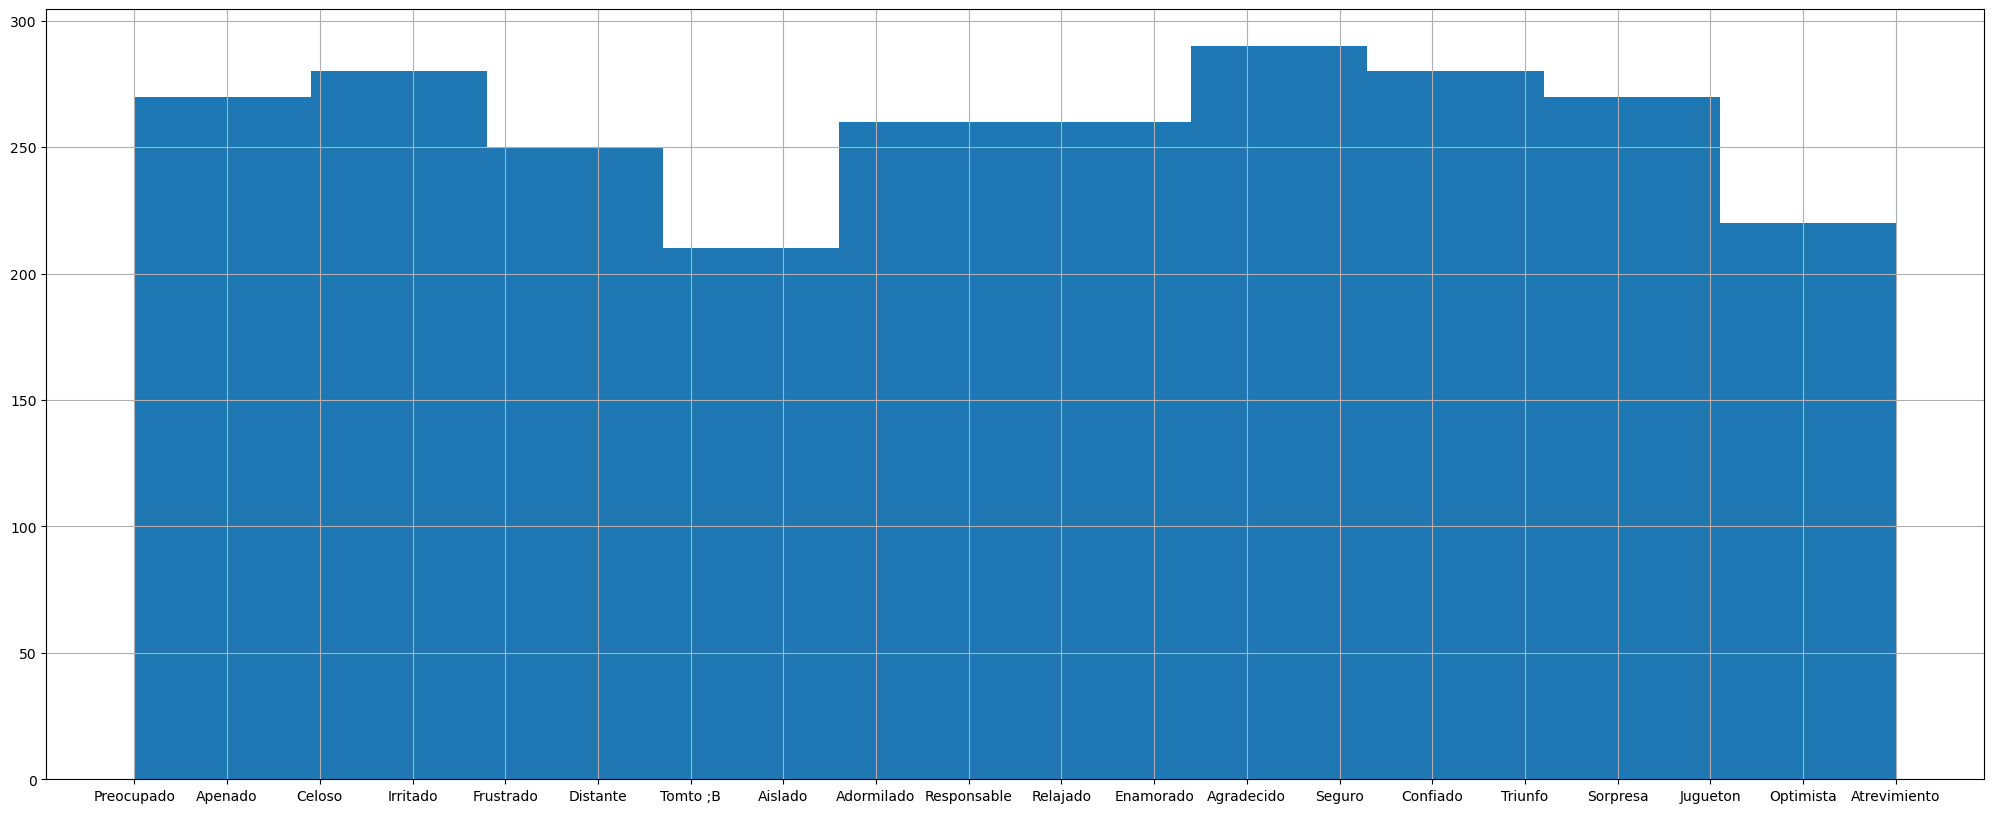

In [7]:
plt.figure(figsize=(25, 10))
sentiment_dataframe['emotion'].hist()
plt.show()



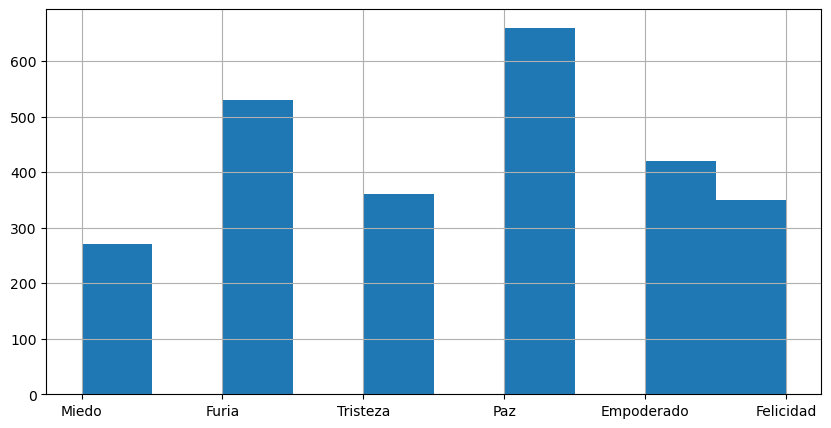

In [8]:
plt.figure(figsize=(10, 5))
sentiment_dataframe['sentiment'].hist()
plt.show()

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt
np.random.seed(73)


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [10]:
target_map ={
        
    'Felicidad': 1,
    'Atrevimiento': 1,
    'Optimista': 2,
    'Jugueton': 3,

    'Empoderado': 2,
    'Sorpresa': 4,
    'Triunfo': 5,
    'Confiado': 6,

    'Paz': 3,
    'Seguro': 7,
    'Agradecido': 8,
    'Enamorado': 9,
    'Relajado': 10,
    'Responsable': 11,

    'Tristeza': 4,
    'Adormilado': 12,
    'Aislado': 13,
    'Tomto ;B': 14,
        
    'Furia': 5,
    'Distante': 15,
    'Frustrado': 16,
    'Irritado': 17,
    'Celoso': 18,
    
    'Miedo': 6,
    'Apenado': 19,
     'Preocupado': 20,
}

classes = ['Atrevimiento', 'Optimista', 'Jugueton', 'Sorpresa', 'Triunfo', 'Confiado', 'Seguro', 'Agradecido', 'Enamorado', 'Relajado', 'Responsable', 'Adormilado', 'Aislado', 'Tomto ;B', 'Distante', 'Frustrado', 'Irritado', 'Celoso', 'Apenado', 'Preocupado']

reversed_map = {value: sentiment for sentiment, value in target_map.items()}

sentiments_map = {
    'Atrevimiento': 'Felicidad',
    'Optimista': 'Felicidad',
    'Jugueton': 'Felicidad',

    'Sorpresa': 'Empoderado',
    'Triunfo': 'Empoderado',
    'Confiado': 'Empoderado',

    'Seguro': 'Paz',
    'Agradecido': 'Paz',
    'Enamorado': 'Paz',
    'Relajado': 'Paz',
    'Responsable': 'Paz',

    'Adormilado': 'Tristeza',
    'Aislado': 'Tristeza',
    'Tomto ;B': 'Tristeza',

    
    'Distante': 'Furia',
    'Frustrado': 'Furia',
    'Irritado': 'Furia',
    'Celoso': 'Furia',
    
    'Apenado': 'Miedo',
     'Preocupado': 'Miedo',
}

In [11]:
sentiment_dataframe['emotion'] =  sentiment_dataframe['emotion'].map(target_map)
dataframe = sentiment_dataframe[['text', 'emotion']].copy()
dataframe.rename(columns = {'emotion': 'target'}, inplace = True)
dataframe.head()

,text,target
0,termine bien abrumado después de hoy,20
1,me siento abrumado,20
2,Me siento un poco abrumado por la cantidad de ...,20
3,Salvador la única persona que no la ha abrumad...,20
4,Denme un helado o algo que ando full abrumado.,20


In [12]:
df_train, df_test = train_test_split(dataframe)

In [13]:
df_train.head()

,text,target
1473,Tengo unas ganas locas de ir a devoto,9
1012,Serían yo somnoliento diciéndole al despertado...,12
716,Estar 4hs desconectado de todo te hace re bien,15
724,"> Art. 144 Las Cortes Generales, mediante ley ...",15
1596,"No puedo cambiar nada de lo que pasó, pero si ...",8


In [14]:
vectorizer = TfidfVectorizer(max_features=2000)

In [15]:
X_train = vectorizer.fit_transform(df_train['text'])
X_train

<1942x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 29094 stored elements in Compressed Sparse Row format>

In [16]:
X_test = vectorizer.transform(df_test['text'])

In [17]:
Y_train = df_train['target']
Y_test = df_test['target']

In [18]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.88259526261586
Test acc: 0.5694444444444444


### Metricas


In [19]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9956448084429115
Test AUC: 0.9232691116199356


In [20]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [21]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.91666667, 0.        , 0.        , 0.        , 0.        ,
        0.01190476, 0.        , 0.01190476, 0.        , 0.03571429,
        0.        , 0.        , 0.01190476, 0.        , 0.        ,
        0.        , 0.01190476, 0.        , 0.        , 0.        ],
       [0.        , 0.80246914, 0.0617284 , 0.04938272, 0.        ,
        0.0617284 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01234568, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01234568, 0.        , 0.        ],
       [0.        , 0.02105263, 0.93684211, 0.        , 0.01052632,
        0.        , 0.01052632, 0.01052632, 0.        , 0.        ,
        0.        , 0.01052632, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.90350877, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

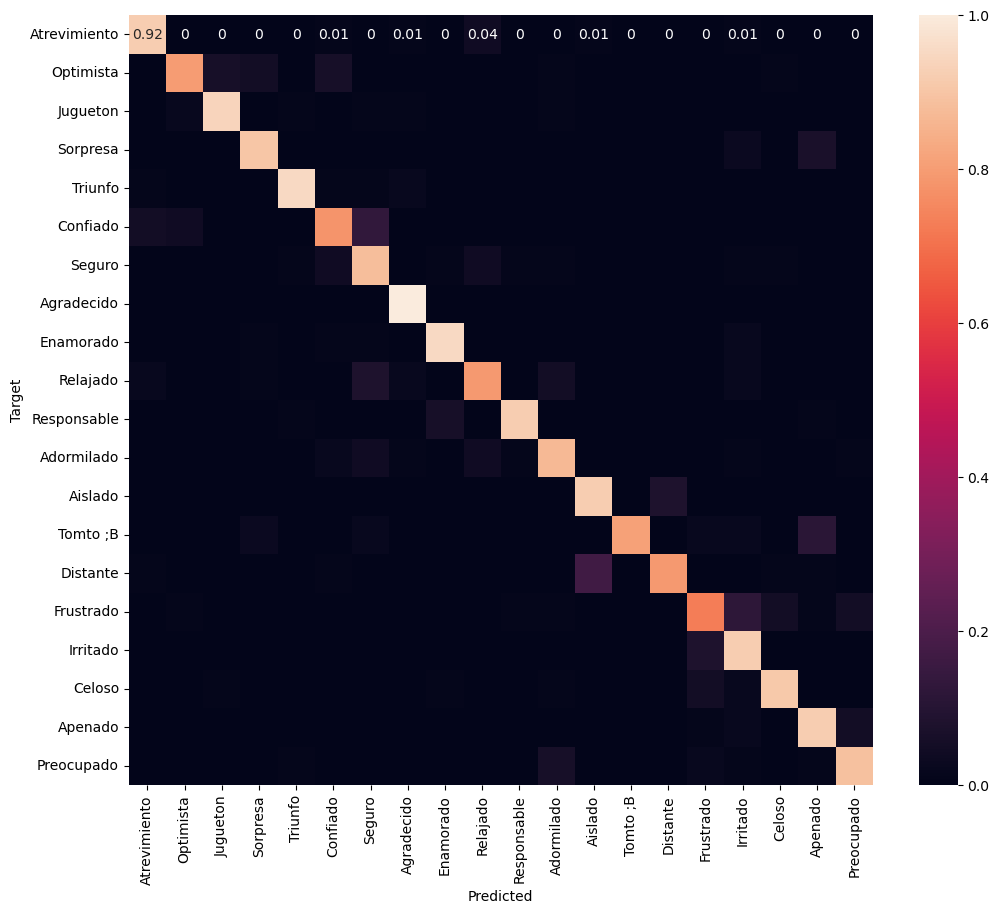

In [22]:
def plot_cm(cm, classes):
  df_cm = pd.DataFrame(cm, index=classes, columns=classes).round(2)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")
    
plt.figure(figsize=(12, 10))
plot_cm(cm, classes)

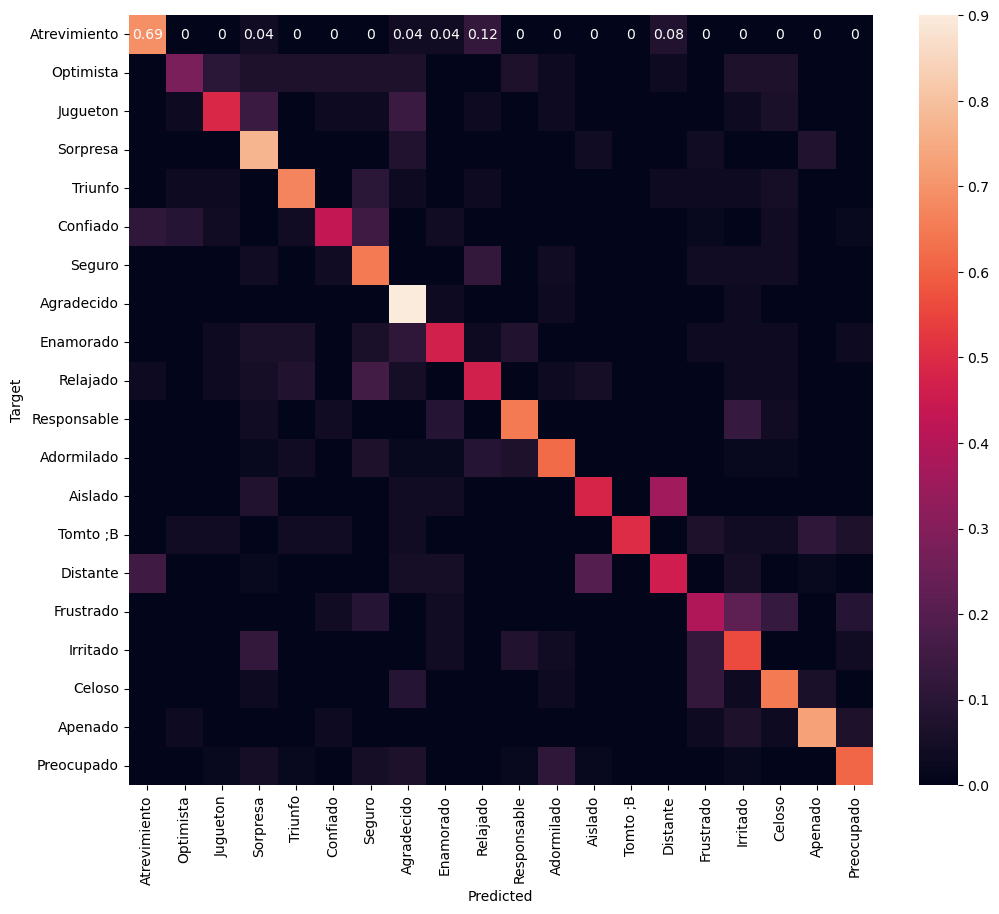

In [23]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')

plt.figure(figsize=(12, 10))
plot_cm(cm_test, classes)

### Pruebas

In [24]:
user_text = '¡Vamos a REcuperar la Región de Valparaíso! 🇨🇱💪  No olvides seguir a nuestros candidatos: 📍 Gobernador Valparaíso: @FVenezian_  📍 Alcalde Valparaíso: @RGonzalezCamus  📍 Alcaldesa Viña del Mar: @antopecchenino   Atentos a nuevas noticias 👀'
user_vector =  vectorizer.transform([user_text])

user_prediction = model.predict(user_vector)
user_prediction

array([18], dtype=int64)

In [25]:
reversed_map[user_prediction[0]]

'Celoso'